In [ ]:
import pandas as pd

# Load SLCP data
slcp = pd.read_csv('slcp_2019-2021.csv', index_col=0, parse_dates=True)

# Load cluster data
for i in range(1,6):
   cluster1 = pd.read_csv('C'+str(i)+'_5.tdump', delimiter='\s+', skiprows=4, header=None, names=['X', 'Y', 'Z', 'T', 'P', 'C'])

# CWT function
def cwt(i, j, C, t):
  """
  Calculates the concentration-weighted trajectory (CWT) of grid (i,j).

  Args:
    i: The row index of the grid.
    j: The column index of the grid.
    C: A list of concentrations, one for each trajectory.
    t: A list of the number of trajectory segment endpoints, one for each grid cell.

  Returns:
    The CWT of grid (i,j).
  """

  sum_c_t = 0
  sum_t = 0
  for l in range(len(C)):
    sum_c_t += C[l] * t[i][j][l]
    sum_t += t[i][j][l]
  return sum_c_t / sum_t

# Calculate CWT
CWT = []
for i in range(0, 10):
    for j in range(0, 10):
        CWT.append(cwt(i, j, slcp['C'], slcp['t']))

# Save CWT
CWT = pd.DataFrame(CWT)
CWT.to_csv('CWT.csv')

# Plot CWT
import matplotlib.pyplot as plt
import numpy as np

CWT = pd.read_csv('CWT.csv', index_col=0)

plt.figure(figsize=(10, 10))
plt.imshow(np.reshape(CWT.values, (10, 10)), cmap='jet')
plt.colorbar()
plt.show()



# Calculate CWT using 2 arrays of concentration and trajectory

In [1]:
import numpy as np

def calculate_cwt(concentration, trajectory):
    """
    Calculate the Concentration-weighted Trajectory (CWT) for PM2.5.

    Args:
    - concentration: 2D array of PM2.5 concentrations for each grid cell
    - trajectory: 3D array of the number of trajectory segment endpoints for each grid cell and time step

    Returns:
    - cwt: 2D array of CWT values for each grid cell
    """

    # Get the shape of the input arrays
    num_cells, num_time_steps = concentration.shape[0], trajectory.shape[2]

    # Initialize arrays to store the numerator and denominator of the CWT equation
    cwt_numerator = np.zeros((num_cells, num_cells))
    cwt_denominator = np.zeros((num_cells, num_cells))

    # Calculate the numerator and denominator of the CWT equation
    for l in range(num_time_steps):
        cwt_numerator += concentration * trajectory[:, :, l]
        cwt_denominator += trajectory[:, :, l]

    # Calculate the CWT values
    cwt = np.where(cwt_denominator != 0, cwt_numerator / cwt_denominator, 0)

    return cwt

# Example input data
concentration = slcp['BC']
trajectory = slcp['trajectory']

# Calculate CWT
cwt = calculate_cwt(concentration, trajectory)

# Print the CWT values
print(cwt)


[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [43]:
import pandas as pd

clusters_df = pd.DataFrame()
# Load cluster data
path = "../HYSPLIT_Data/clusters/C"
# for i in clusters:
#     df = pd.read_csv(path+str(i)+"_5.tdump", skiprows=3, nrows=186, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
#     df['cluster'] = i
#     pd.concat([clusters_df, df], axis=1)
c1 = pd.read_csv(path+"1_5.tdump", skiprows=3, nrows=186, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
c2 = pd.read_csv(path+"2_5.tdump", skiprows=3, nrows=86, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
c3 = pd.read_csv(path+"3_5.tdump", skiprows=3, nrows=143, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
c4 = pd.read_csv(path+"4_5.tdump", skiprows=3, nrows=132, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
c5 = pd.read_csv(path+"5_5.tdump", skiprows=3, nrows=180, header=None, names=['year', 'month', 'day', 'hour','lat', 'lon', 'height'], delim_whitespace=True)
clusters = [c1,c2,c3,c4,c5]

for i,c in enumerate(clusters):
    c['cluster'] = i+1
    clusters_df = pd.concat([clusters_df, c], axis=0)
    
clusters_df.head()


,year,month,day,hour,lat,lon,height,cluster
0,19,1,2.0,19.0,21.0,105.8,100.0,1
1,19,1,3.0,7.0,21.0,105.8,100.0,1
2,19,1,3.0,19.0,21.0,105.8,100.0,1
3,19,1,4.0,7.0,21.0,105.8,100.0,1
4,19,1,4.0,19.0,21.0,105.8,100.0,1


In [46]:
clusters_df['cluster'].value_counts()

1    186
5    180
3    143
4    132
2     86
Name: cluster, dtype: int64

In [21]:
import pandas as pd

c1 = pd.read_csv('../HYSPLIT_Data/clusters/C1_5.tdump', skiprows=190, header=None, names=['d1','d2','year', 'month', 'day', 'hour','d3', 'd4', 'd5', 'lat', 'lon', 'height', 'pressure'], delim_whitespace=True)
sel_cols = ['year', 'month', 'day', 'hour', 'lat', 'lon']
c1 = c1[sel_cols]
c1.head()

,year,month,day,hour,lat,lon
0,19,1,2,19,21.0,105.8
1,19,1,3,7,21.0,105.8
2,19,1,3,19,21.0,105.8
3,19,1,4,7,21.0,105.8
4,19,1,4,19,21.0,105.8


In [11]:
# Count number of each unique value in tdump.month
c1.month.value_counts()

11    4727
12    3153
10    3131
9     3045
1     2496
3     1936
8     1077
5      907
7      555
4      545
2      363
6      284
Name: month, dtype: int64

In [22]:
c2 = pd.read_csv('../HYSPLIT_Data/clusters/C2_5.tdump', skiprows=89, header=None, names=['d1','d2','year', 'month', 'day', 'hour','d3', 'd4', 'd5', 'lat', 'lon', 'height', 'pressure'], delim_whitespace=True)
sel_cols = ['year', 'month', 'day', 'hour', 'lat', 'lon']
c2 = c2[sel_cols]
c2.head()

,year,month,day,hour,lat,lon
0,19,1,6,19,21.0,105.8
1,19,1,7,7,21.0,105.8
2,19,1,7,19,21.0,105.8
3,19,1,8,7,21.0,105.8
4,19,1,10,19,21.0,105.8


In [6]:
c3 = pd.read_csv('../HYSPLIT_Data/clusters/C3_5.tdump', skiprows=148, header=None, names=['d1','d2','year', 'month', 'day', 'hour','d3', 'd4', 'd5', 'lat', 'lon', 'height', 'pressure'], delim_whitespace=True)
sel_cols = ['year', 'month', 'day', 'hour', 'lat', 'lon']
c3 = c3[sel_cols]
c3.head()

,year,month,day,hour,lat,lon
0,19,1,11,7,21.0,105.8
1,19,1,11,19,21.0,105.8
2,19,1,12,7,21.0,105.8
3,19,1,12,19,21.0,105.8
4,19,1,13,7,21.0,105.8


In [7]:
c4 = pd.read_csv('../HYSPLIT_Data/clusters/C4_5.tdump', skiprows=136, header=None, names=['d1','d2','year', 'month', 'day', 'hour','d3', 'd4', 'd5', 'lat', 'lon', 'height', 'pressure'], delim_whitespace=True)
sel_cols = ['year', 'month', 'day', 'hour', 'lat', 'lon']
c4 = c4[sel_cols]
c4.head()

,year,month,day,hour,lat,lon
0,19,2,7,7,21.0,105.8
1,19,2,8,7,21.0,105.8
2,19,2,8,19,21.0,105.8
3,19,4,9,7,21.0,105.8
4,19,4,18,7,21.0,105.8


In [8]:
c5 = pd.read_csv('../HYSPLIT_Data/clusters/C5_5.tdump', skiprows=184, header=None, names=['d1','d2','year', 'month', 'day', 'hour','d3', 'd4', 'd5', 'lat', 'lon', 'height', 'pressure'], delim_whitespace=True)
sel_cols = ['year', 'month', 'day', 'hour', 'lat', 'lon']
c5 = c5[sel_cols]
c5.head()

,year,month,day,hour,lat,lon
0,19,2,7,19,21.0,105.8
1,19,2,9,7,21.0,105.8
2,19,2,18,7,21.0,105.8
3,19,2,18,19,21.0,105.8
4,19,2,19,7,21.0,105.8


In [70]:
c5.describe()

,year,month,day,hour,lat,lon,height
count,21780.0,21780.000000,21780.000000,21780.000000,21780.000000,21780.000000,21780.000000
mean,19.0,6.743893,15.769605,11.514050,18.379480,107.118558,38.034555
std,0.0,2.438042,9.118667,6.916917,3.573484,4.195913,54.400683
min,19.0,2.000000,1.000000,0.000000,8.420000,89.603000,0.000000
25%,19.0,5.000000,7.000000,6.000000,15.778000,105.355000,2.600000
50%,19.0,7.000000,16.000000,12.000000,18.783000,106.355000,18.900000
75%,19.0,9.000000,24.000000,18.000000,20.768000,108.373000,57.800000
max,19.0,12.000000,31.000000,23.000000,33.186000,125.832000,699.700000


In [9]:
# c1 = tdump

# Merge the year, month, day, and hour columns into a single datetime column
def merge_date(df):
    df['datetime'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str) + ' ' + df['hour'].astype(str)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%y-%m-%d %H')
    return df

# merge_date(c2)
# c2.head()



In [24]:
clusters =[c1, c2, c3, c4, c5]

for c in clusters:
    merge_date(c)

In [25]:
for i, c in enumerate(clusters):
    c.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
    c['cluster'] = i+1
    print(c.head())



    lat    lon            datetime  cluster
0  21.0  105.8 2019-01-02 19:00:00        1
1  21.0  105.8 2019-01-03 07:00:00        1
2  21.0  105.8 2019-01-03 19:00:00        1
3  21.0  105.8 2019-01-04 07:00:00        1
4  21.0  105.8 2019-01-04 19:00:00        1
    lat    lon            datetime  cluster
0  21.0  105.8 2019-01-06 19:00:00        2
1  21.0  105.8 2019-01-07 07:00:00        2
2  21.0  105.8 2019-01-07 19:00:00        2
3  21.0  105.8 2019-01-08 07:00:00        2
4  21.0  105.8 2019-01-10 19:00:00        2
    lat    lon            datetime  cluster
0  21.0  105.8 2019-01-11 07:00:00        3
1  21.0  105.8 2019-01-11 19:00:00        3
2  21.0  105.8 2019-01-12 07:00:00        3
3  21.0  105.8 2019-01-12 19:00:00        3
4  21.0  105.8 2019-01-13 07:00:00        3
    lat    lon            datetime  cluster
0  21.0  105.8 2019-02-07 07:00:00        4
1  21.0  105.8 2019-02-08 07:00:00        4
2  21.0  105.8 2019-02-08 19:00:00        4
3  21.0  105.8 2019-04-09 07:00:

In [26]:
cluster_df = pd.DataFrame()
for c in clusters:
    cluster_df = cluster_df.append(c)
cluster_df.set_index('datetime', inplace=True)
cluster_df.head()

C:\Users\Tung Do\AppData\Local\Temp\ipykernel_10816\3086996589.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_df = cluster_df.append(c)
C:\Users\Tung Do\AppData\Local\Temp\ipykernel_10816\3086996589.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_df = cluster_df.append(c)
C:\Users\Tung Do\AppData\Local\Temp\ipykernel_10816\3086996589.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_df = cluster_df.append(c)


,lat,lon,cluster
datetime,,,
2019-01-02 19:00:00,21.0,105.8,1
2019-01-03 07:00:00,21.0,105.8,1
2019-01-03 19:00:00,21.0,105.8,1
2019-01-04 07:00:00,21.0,105.8,1
2019-01-04 19:00:00,21.0,105.8,1


In [28]:
cluster_df.to_csv('clusters.csv')

In [37]:
clusters_m = pd.read_csv('clusters.txt', header=0, delim_whitespace=True)
merge_date(clusters_m)
clusters_m.set_index('datetime', inplace=True)
clusters_m.sort_index(inplace=True)
# cluster_df['cluster'].resample('H').ffill
# cluster_df.to_csv('clusters_resampled.csv')

# Count duplicate rows in cluster_df
# clusters_m.duplicated().sum()
clusters_m.head()

,year,month,day,hour,lat,lon,height
0,19,1,2,19,21.0,105.8,100.0
1,19,1,3,7,21.0,105.8,100.0
2,19,1,3,19,21.0,105.8,100.0
3,19,1,4,7,21.0,105.8,100.0
4,19,1,4,19,21.0,105.8,100.0


In [84]:
# Load slcp data
slcp = pd.read_csv('slcp2019hourly.csv', index_col=0, parse_dates=True)

# Check each row if it is on the day of each cluster
# If it is, then add the cluster number to the row
import numpy as np
# Create a new column to store the cluster number
slcp['cluster'] = np.nan
for i in range(len(slcp)):
    for j in range(len(clusters)):
        # Check if the day of the row is in clusters[j]['datetime]
        if slcp.index[i].to_numpy().astype('datetime64[D]') in clusters[j]['datetime'].values.astype('datetime64[D]'):
            slcp['cluster'][i] = j+1
            break
        else:
            continue
slcp.head(10)






,BC,Ozone,PM2.5,BC/PM,cluster
Tstamp,,,,,
2019-01-01 00:00:00,2.45,16.29,29.85,0.082077,1.0
2019-01-01 01:00:00,2.48,14.59,32.77,0.075679,1.0
2019-01-01 02:00:00,1.81,15.10,30.55,0.059247,1.0
2019-01-01 03:00:00,1.93,15.69,27.14,0.071113,1.0
2019-01-01 04:00:00,3.00,16.77,32.37,0.092678,1.0
2019-01-01 05:00:00,4.80,17.47,29.66,0.161834,1.0
2019-01-01 06:00:00,3.89,15.23,42.41,0.091724,1.0
2019-01-01 07:00:00,2.18,13.22,36.99,0.058935,1.0
2019-01-01 08:00:00,4.61,14.58,32.40,0.142284,1.0


In [76]:
slcp[slcp['cluster'] == 4].head()

,BC,Ozone,PM2.5,BC/PM,cluster
Tstamp,,,,,
2019-04-18 00:00:00,1.31,26.99,42.69,0.030686,4.0
2019-04-18 01:00:00,1.35,14.71,47.47,0.028439,4.0
2019-04-18 02:00:00,1.32,8.36,48.59,0.027166,4.0
2019-04-18 03:00:00,1.08,6.59,43.64,0.024748,4.0
2019-04-18 04:00:00,1.32,8.29,47.21,0.027960,4.0


In [85]:
slcp['cluster'].value_counts()

1.0    5267
4.0    1137
2.0    1029
3.0     708
5.0      97
Name: cluster, dtype: int64

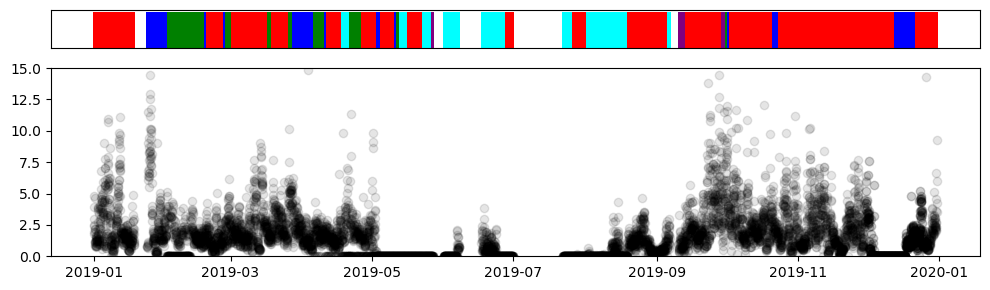

In [69]:
# Plot BC with hue as cluster
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 3), sharex=True, gridspec_kw={'height_ratios': [0.2, 1]})
y1 = slcp[slcp['cluster'] == 1]['cluster']
y2 = slcp[slcp['cluster'] == 2]['cluster']
y3 = slcp[slcp['cluster'] == 3]['cluster']
y4 = slcp[slcp['cluster'] == 4]['cluster']
y5 = slcp[slcp['cluster'] == 5]['cluster']
# Filter out negative values of BC
slcp['BC'] = slcp['BC'].where(slcp['BC'] > 0, 0)

# plt.bar(y1.index, y1, color='red', label='Cluster 1')
# plt.bar(y2.index, y2, color='blue', label='Cluster 2')
# plt.bar(y3.index, y3, color='green', label='Cluster 3')
# plt.bar(y4.index, y4, color='cyan', label='Cluster 4')
# plt.bar(y5.index, y5, color='purple', label='Cluster 5')

ax[0].bar(y1.index, 0.2, color='red', label='Cluster 1')
ax[0].bar(y2.index, 0.2, color='blue', label='Cluster 2')
ax[0].bar(y3.index, 0.2, color='green', label='Cluster 3')
ax[0].bar(y4.index, 0.2, color='cyan', label='Cluster 4')
ax[0].bar(y5.index, 0.2, color='purple', label='Cluster 5')
daily_mean_BC = slcp['BC'].resample('D').mean()
ax[1].scatter(slcp.index, slcp['BC'], color='black', alpha=0.1, label='BC')
ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)
ax[1].set_ylim(0, 15)
plt.tight_layout()
plt.show()







In [62]:
x = slcp.index[43]

# Convert x to a datetime object
x = pd.to_datetime(x)
# x.strftime('%Y-%m-%d')
x.to_datetime64().astype('datetime64[D]')

numpy.datetime64('2019-01-02')

In [47]:
clusters[0]['datetime'].values.astype('datetime64[D]')

array(['2019-01-02', '2019-01-03', '2019-01-03', ..., '2019-12-25',
       '2019-12-26', '2019-12-26'], dtype='datetime64[D]')

In [64]:
if slcp.index[42].to_datetime64().astype('datetime64[D]') in clusters[0]['datetime'].values.astype('datetime64[D]'):
    print('yes')

yes


In [ ]:
def get_density(self, lon, lat, density=True):
    density, lonx, latx = np.histogram2d(lon, lat, [self.lonx, self.latx], density=density)
    return density

def calculate_cwt(self, weighted=True):
    cwt = np.zeros((self.lonx.shape[0]-1, self.latx.shape[0]-1))
    tau = np.zeros_like(cwt)
    nums = np.zeros_like(cwt)
    for column in self.lat.columns:
        tlen = float(len(self.lat[column].values))
        num = self.get_density(self.lon[column].values.flatten(), self.lat[column].values.flatten, density=False)

In [87]:
element = ['2019-01-01', '2019-01-09']
t1 = pd.date_range('2019-01-01', '2019-01-05', freq='D')
t2 = pd.date_range('2019-01-06', '2019-01-08', freq='D')
t3 = pd.date_range('2019-01-09', '2019-01-12', freq='D')
element_test = [t1, t2, t3]
result = []
for i in range(len(element)):
    for j in range(len(element_test)):
        if element[i] in element_test[j]:
            result.append(j+1)
            break
        else:
            continue
print(result)

[1, 3]
